In [29]:
# Với bộ dữ liệu chất lượng rượu: wine
# Gộp nhóm 0 và 1 thành 1 loại, để loại 2 riêng (rượu chất lượng tốt) --> bài toán binary (2 lớp)
# Sử dụng 1 trong các thuật toán đã học (logistic, tree, forest, svm, kmeans) để xây dựng mô hình
# Yêu cầu cross-validate tối thiểu 30 lần
# Yêu cầu sử dụng GridSearch để tối ưu tham số

# Lecture 07 - Homework

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [2]:
from sklearn import metrics, datasets

In [3]:
from sklearn.datasets import load_wine

In [4]:
load_func = load_wine
data = load_func(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
df = data['frame']
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df['target'].value_counts(dropna=False)

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

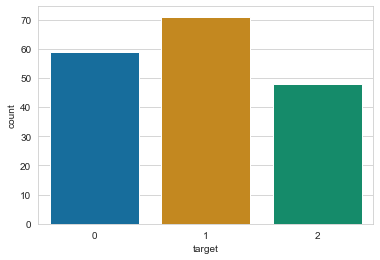

In [8]:
sns.countplot(data=df, x='target')

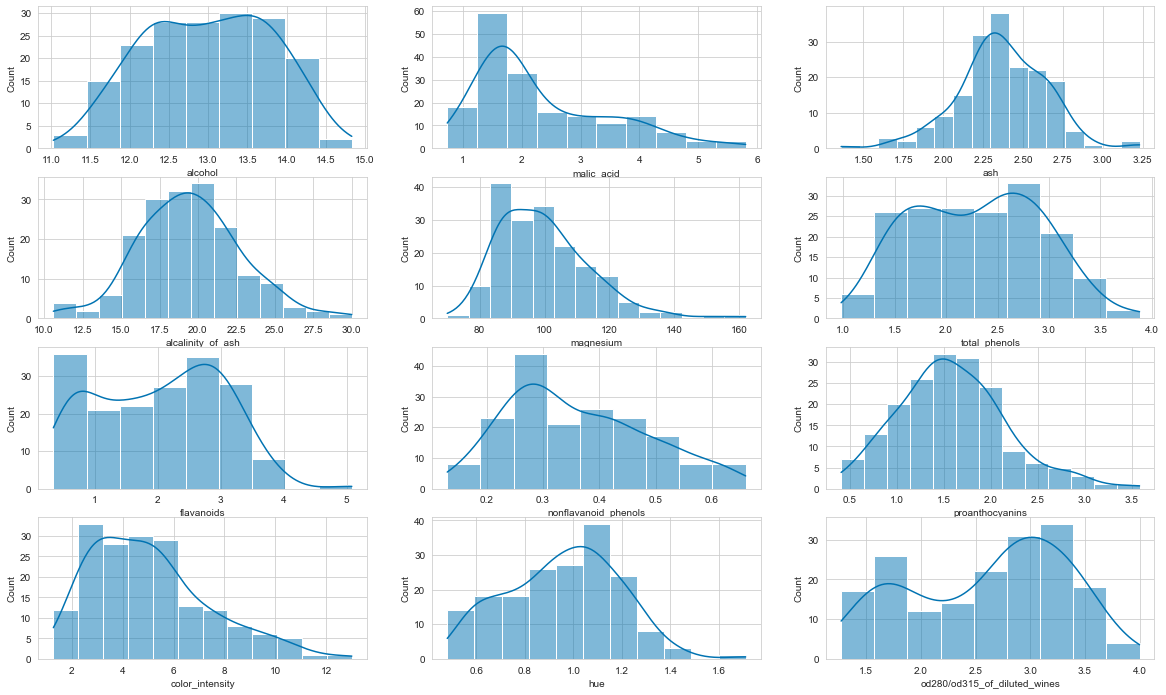

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(df.columns, axs.ravel()):
    sns.histplot(data=df, x=col_name, kde=True, ax=ax)

### Gộp target 0, 1 thành 0; 2 thành 1

In [17]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [20]:
y_binary = y.eq(2).astype(int)
y_binary.value_counts(dropna=False)

0    130
1     48
Name: target, dtype: int64

In [21]:
X = df.drop(columns='target')
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, stratify=y_binary, random_state=30)

In [29]:
logit_model = LogisticRegression(max_iter = 1000)
logit_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred = logit_model.predict(x_test)

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.93      0.93      0.93        15

    accuracy                           0.96        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.96      0.96      0.96        54



In [32]:
display(
    metrics.accuracy_score(y_test, y_pred),
    metrics.f1_score(y_test, y_pred), 
    metrics.precision_score(y_test, y_pred), 
    metrics.recall_score(y_test, y_pred)
)

0.9629629629629629

0.9333333333333333

0.9333333333333333

0.9333333333333333

In [33]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.8973384 , -0.10472973,  0.20143885, ...,  0.22222222,
         0.92494929,  0.80804954],
       [ 0.11406844, -0.05743243, -0.63309353, ...,  0.25185185,
         0.5030426 ,  0.77708978],
       [ 0.08365019,  0.33445946,  0.89208633, ...,  0.19259259,
         0.31643002,  1.05572755],
       ...,
       [ 0.16730038,  1.63175676, -0.28776978, ..., -1.11111111,
        -0.98985801,  0.33333333],
       [ 0.09125475,  0.48986486,  0.02877698, ..., -1.08148148,
        -0.94117647,  0.34365325],
       [ 0.82129278,  1.51013514,  1.09352518, ..., -1.05185185,
        -0.95740365, -0.23426213]])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, 
                                                    stratify=y_binary, random_state=30)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
display(
    metrics.accuracy_score(y_test, y_pred),
    metrics.f1_score(y_test, y_pred), 
    metrics.precision_score(y_test, y_pred), 
    metrics.recall_score(y_test, y_pred)
)

0.9814814814814815

0.9655172413793104

1.0

0.9333333333333333